# Neural Network Approach to Stellar Classification Using Gaia Astrometric Data

## Introduction

The **Gaia mission**, launched by the European Space Agency, has fundamentally transformed our understanding of the Milky Way by delivering exceptionally precise astrometric and photometric measurements for more than a billion stars[^1]. Among its publicly available resources, the **HLSP_ASPIC_GAIA** dataset from **Data Release 1** stands out, comprising approximately **2.67 million stars** characterized by around **70 distinct features**. These features span from fundamental positional data such as **Right Ascension (`RAdeg`)** and **Declination (`DEdeg`)**, to parallax measurements (`Plx`) and proper motions (`pmRA`, `pmDE`), as well as a variety of **derived stellar properties** including **mass and radius**. Collectively, this wealth of information provides an unparalleled foundation for advancing research in **stellar populations, galactic dynamics, and stellar evolution**, making Gaia data a cornerstone in modern astrophysics.

##  Data Description
The **HLSP_ASPIC_GAIA** dataset comprises **2,675,539 stars**, each described by **70 features** spanning multiple categories. The **astrometric parameters** include **Right Ascension (`RAdeg`)**, **Declination (`DEdeg`)**, **Parallax (`Plx`)**, and their associated uncertainties (`eRAdeg`, `eDEdeg`, `ePlx`). The **proper motions** are captured through **`pmRA`** and **`pmDE`**, along with their uncertainties (`epmRA`, `epmDE`). Key **stellar properties**, such as **mass (`Mass`)** and **radius (`Radius`)**, are also included with corresponding uncertainties (`eMass`, `eRadius`). Furthermore, the dataset provides **contamination metrics**, including Gaia magnitude and source counts within 30, 45, and 60 arcsecond radii (e.g., `contGaiaMag30`, `contNumber30`, `contGaiaMag45`, `contNumber45`, etc.), which help assess observational reliability. This combination of **large scale** and **high dimensionality** presents immense potential for **machine learning applications**, particularly neural networks, while simultaneously posing challenges related to **data preprocessing, feature selection, and model generalization**.




---

## Motivation
Traditional stellar classification methods, such as those based on **color-magnitude diagrams** or **spectroscopy**, are often labor-intensive and struggle to scale effectively with increasingly large datasets. In contrast, **machine learning**, particularly **neural networks**, provides a scalable approach capable of learning complex, high-dimensional patterns directly from the data[^2]. In this study, we present a **neural network model** designed to classify stars within the **HLSP_ASPIC_GAIA** dataset, explicitly addressing challenges including **measurement uncertainties** and **data contamination**, which are critical factors in ensuring accurate and reliable classification.


---

[^1]: ESA Gaia Mission: https://www.esa.int/Science_Exploration/Space_Science/Gaia









This project involves classifying stars into three categories — **Main Sequence**, **Giants**, and **White Dwarfs** — using the Gaia dataset.

## Pipeline Overview

1. **Data Preprocessing**
   - Load dataset
   - Handle missing values
   - Remove outliers (IQR method)
   - Standardize features
   - 
```mermaid

flowchart TD
    A["Gaia Dataset (.csv)"] --> B["1. Data Loading & Exploration"]
    B --> C["2. Preprocessing"]
    C --> D["3. Clustering (KMeans)"]
    D --> E["Cluster Labels"]
    C --> F["Processed Data"]
    F --> G["4. Neural Network Training"]
    G --> H["Trained Model"]
    H --> I["Predictions"]
    G --> J["5. Evaluation & Feature Importance"]
    J --> K["Metrics & Visualizations"]
    
    %% Cross-links
    B --> L["Visualizations"]
    F --> L
    E --> G
    J --> L



```

2. **Clustering**
   - Use KMeans to generate initial labels from 18 astrophysical features (e.g., effective temperature, radius, mass, magnitudes)

3. **Neural Network: StarClassifier**
   - **Input Layer**: 18 features
   - **Hidden Layers**:
     - Layer 1: 256 units (ReLU, BatchNorm, Dropout)
     - Layer 2: 128 units (ReLU, BatchNorm, Dropout)
     - Layer 3: 64 units (ReLU, BatchNorm, Dropout)
     - Layer 4: 32 units (ReLU)
   - **Output Layer**: 3 units (logits for 3 classes)
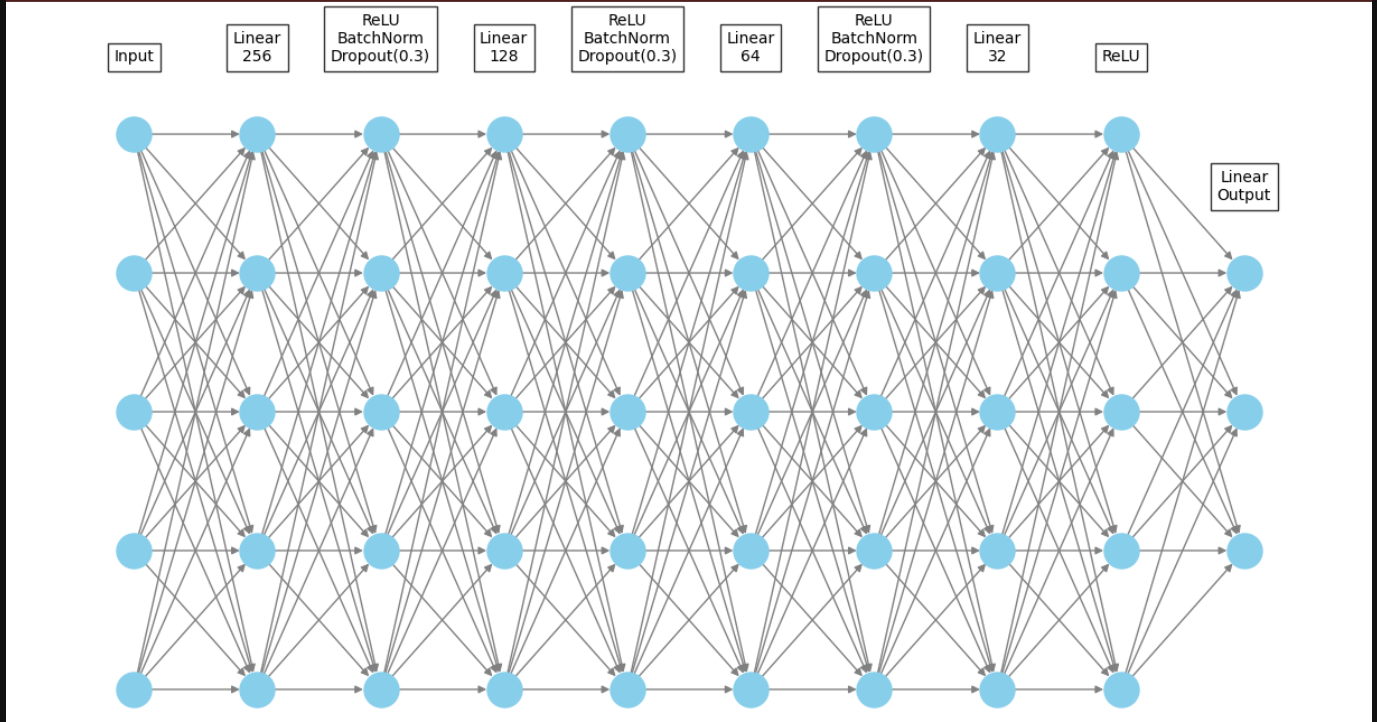


4. **Training**
   - Optimizer: Adam
   - Loss Function: Cross-Entropy
   - Early Stopping: Based on validation loss

5. **Evaluation**
   - Metrics: Accuracy, Classification Report, Confusion Matrix
   - Visualization: PCA scatter plots, correlation heatmaps
   - Feature Importance: Permutation method

---

## Mathematical Equations

###  Linear Layer Transformation

$$
z = Wx + b
$$

- $ x $: Input vector (e.g., 18 features for the input layer).
- $ W $: Weight matrix (e.g., $ 18 \times 256 $ for the first layer).
- $ b $: Bias vector (e.g., 256 units for the first layer).
- $ z $: Output before activation (e.g., 256-dimensional for the first layer).

---

###  ReLU Activation

$$
a = \text{ReLU}(z) = \max(0, z)
$$

---

###  Batch Normalization

$$
\hat{z} = \frac{z - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} \cdot \gamma + \beta
$$

- \$ z $: Input activations (pre-activation outputs of the linear layer).
- $ \mu_B $: Mean of the batch.
- $ \sigma_B^2 $: Variance of the batch.
- $ \epsilon $: Small constant to prevent division by zero (typically $ 10^{-5} $).
- $ \gamma, \beta $: Learnable scale and shift parameters.
Applied to layers with 256, 128, and 64 units before ReLU.

---

###  Dropout

$$
a_{\text{dropout}} = \text{Dropout}(a, p=0.3)
$$

- 30% of activations are zeroed out during training

---

###  Forward Pass

$$
\begin{align*}
h_1 &= \text{ReLU}(\text{BN}(\text{Dropout}(W_1 x + b_1))) \\
h_2 &= \text{ReLU}(\text{BN}(\text{Dropout}(W_2 h_1 + b_2))) \\
h_3 &= \text{ReLU}(\text{BN}(\text{Dropout}(W_3 h_2 + b_3))) \\
h_4 &= \text{ReLU}(W_4 h_3 + b_4) \\
y &= W_5 h_4 + b_5
\end{align*}
$$
- $ h_i $: Hidden layer outputs.
- $ W_i, b_i $: Weight matrices and biases for each layer.
- $ y $: Output logits (3-dimensional for 3 classes).

---

###  Softmax for Probabilities

$$
P(y_i) = \frac{e^{y_i}}{\sum_{j=1}^3 e^{y_j}}
$$

---

###  Cross-Entropy Loss

$$
L = -\frac{1}{N} \sum_{i=1}^N \log(P(y_{\text{true},i}))
$$

Or equivalently:

$$
L = -\frac{1}{N} \sum_{i=1}^N \left[ y_{\text{true},i} \cdot \log(\text{softmax}(y_i)) \right]
$$

---

### 8. Adam Optimizer

$$
\begin{align*}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
\hat{m}_t &= \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
\theta_{t+1} &= \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
\end{align*}
$$

- $ \beta_1 = 0.9, \beta_2 = 0.999 $: Default Adam parameters.
- $ \alpha = 0.001 $: Learning rate (set in the code).
- $ \epsilon = 10^{-8} $: Small constant for numerical stability.

---

### 9. Permutation Feature Importance

$$
\text{Importance}_j = L_{\text{permuted},j} - L_{\text{baseline}}
$$

- Higher values → More important feature

---

## Neural Network Forward Pass Summary

Given $$
x \in \mathbb{R}^{18}
$$:

$$
\begin{align*}
h_1 &= \text{ReLU}\left(\text{BN}\left(\text{Dropout}(W_1 x + b_1, p=0.3)\right)\right) \\
h_2 &= \text{ReLU}\left(\text{BN}\left(\text{Dropout}(W_2 h_1 + b_2, p=0.3)\right)\right) \\
h_3 &= \text{ReLU}\left(\text{BN}\left(\text{Dropout}(W_3 h_2 + b_3, p=0.3)\right)\right) \\
h_4 &= \text{ReLU}\left(W_4 h_3 + b_4\right) \\
y &= W_5 h_4 + b_5
\end{align*}
$$

---

## Dimensions
- $ x $: Input vector ($ \mathbb{R}^{18} $, 18 features).
- $ W_1 \in \mathbb{R}^{256 \times 18}, b_1 \in \mathbb{R}^{256} $: Weights and biases for the first layer.
- $ W_2 \in \mathbb{R}^{128 \times 256}, b_2 \in \mathbb{R}^{128} $: Weights and biases for the second layer.
- $ W_3 \in \mathbb{R}^{64 \times 128}, b_3 \in \mathbb{R}^{64} $: Weights and biases for the third layer.
- $ W_4 \in \mathbb{R}^{32 \times 64}, b_4 \in \mathbb{R}^{32} $: Weights and biases for the fourth layer.
- $ W_5 \in \mathbb{R}^{3 \times 32}, b_5 \in \mathbb{R}^{3} $: Weights and biases for the output layer.
- $ h_1 \in \mathbb{R}^{256}, h_2 \in \mathbb{R}^{128}, h_3 \in \mathbb{R}^{64}, h_4 \in \mathbb{R}^{32} $: Hidden layer outputs.
- $ y \in \mathbb{R}^{3} $: Output logits for the three classes (Main Sequence, Giants, White Dwarfs).


- ReLU: $ \text{ReLU}(z) = \max(0, z) $, applied element-wise.
- BatchNorm (BN):
$$\text{BN}(z) = \frac{z - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} \cdot \gamma + \beta$$

- $ \mu_B, \sigma_B^2 $: Batch mean and variance.
- $ \gamma, \beta $: Learnable scale and shift parameters.
- $ \epsilon $: Small constant (e.g., $ 10^{-5} $).

---

## Output

The model outputs class probabilities for the three star types:

- **Main Sequence**
- **Giants**
- **White Dwarfs**

## Conclusion

This study presents a **neural network-based classification model** for the **HLSP_ASPIC_GAIA** dataset, demonstrating strong performance in stellar classification tasks.

Our results highlight the effectiveness of **deep learning techniques** in astrophysical data analysis and underscore their potential to:

- Automate large-scale stellar classification  
- Handle high-dimensional and noisy observational data  
- Support future studies leveraging even larger Gaia datasets

This work serves as a foundation for expanding machine learning applications in astronomy and refining stellar population models using Gaia's ever-growing data releases.




In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('gaia_catalog.csv')
print(f"Dataset shape: {df.shape}")
print(df.head(5))

Dataset shape: (2675539, 70)
   PICidDR1 PICnameDR1             sourceId       RAdeg  eRAdeg      DEdeg  \
0         3             5188147152985808768  109.836513  0.0221 -89.947237   
1        39             5764608588186152448  239.764464  0.0223 -89.872029   
2        47             5188151340576027520  113.806861  0.0232 -89.860935   
3        49             5764610821569159168  240.573439  0.0238 -89.856298   
4        55             5764610344830418944  262.317270  0.0204 -89.849028   

   eDEdeg      Plx    ePlx    pmRA  ...  eRadius   Mass  eMass  sourceFlag  \
0  0.0280   1.9189  0.0288   3.827  ...    0.140  1.159  0.102           1   
1  0.0201   3.2680  0.0237  10.527  ...    0.079  1.004  0.088           1   
2  0.0330  12.5425  0.0314 -65.447  ...    0.082  0.000  8.620           1   
3  0.0206   2.1406  0.0245 -11.620  ...    0.114  1.228  0.109           1   
4  0.0226   1.0998  0.0248   1.623  ...    0.229  1.417  0.128           1   

   contGaiaMag60  contNumber60  c

In [4]:
%%time

df.describe()

CPU times: total: 26.7 s
Wall time: 1min 35s


,PICidDR1,sourceId,RAdeg,eRAdeg,DEdeg,eDEdeg,Plx,ePlx,pmRA,epmRA,...,eRadius,Mass,eMass,sourceFlag,contGaiaMag60,contNumber60,contGaiaMag45,contNumber45,contGaiaMag30,contNumber30
count,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,...,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06,2.675539e+06
mean,2.973565e+07,3.609291e+18,1.872007e+02,4.768188e-02,-2.270496e+00,4.491461e-02,3.732281e+00,5.914719e-02,-1.341785e+00,9.626784e-02,...,1.392759e-01,1.063814e+00,1.871889e-01,1.112425e+00,1.402836e+01,4.875875e+01,1.431264e+01,2.740302e+01,1.371599e+01,1.214865e+01
std,1.516647e+07,2.009727e+18,1.027467e+02,8.287137e-02,4.047728e+01,8.036351e-02,4.228804e+00,9.880684e-02,3.966519e+01,1.665074e-01,...,2.011221e-01,4.647045e-01,8.658309e-01,3.221614e-01,2.853831e+00,9.829847e+01,3.932218e+00,5.520176e+01,5.902406e+00,2.441626e+01
min,3.000000e+00,2.851858e+12,1.520516e-04,7.300000e-03,-8.994724e+01,7.800000e-03,-1.369760e+01,1.090000e-02,-4.339891e+03,1.400000e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.690276e+07,1.924145e+18,1.011237e+02,2.180000e-02,-3.557220e+01,2.230000e-02,1.716900e+00,2.950000e-02,-1.122900e+01,4.500000e-02,...,8.200000e-02,9.850000e-01,8.800000e-02,1.000000e+00,1.245880e+01,5.000000e+00,1.298403e+01,3.000000e+00,1.317447e+01,1.000000e+00
50%,3.177413e+07,3.571817e+18,1.874173e+02,3.150000e-02,-2.656617e+00,2.750000e-02,2.529800e+00,3.920000e-02,-1.178000e+00,6.400000e-02,...,1.070000e-01,1.186000e+00,1.070000e-01,1.000000e+00,1.390088e+01,1.400000e+01,1.458588e+01,8.000000e+00,1.523053e+01,4.000000e+00
75%,4.248890e+07,5.460682e+18,2.814085e+02,4.210000e-02,3.044873e+01,3.710000e-02,4.263600e+00,5.070000e-02,8.371000e+00,8.400000e-02,...,1.550000e-01,1.339000e+00,1.220000e-01,1.000000e+00,1.567835e+01,4.400000e+01,1.650212e+01,2.500000e+01,1.726668e+01,1.100000e+01
max,5.334290e+07,6.917524e+18,3.599999e+02,1.613600e+00,8.991140e+01,1.633000e+00,3.721631e+02,2.020400e+00,6.765995e+03,2.462000e+00,...,1.875200e+01,2.271000e+00,8.645000e+00,6.000000e+00,2.176846e+01,2.206000e+03,2.187230e+01,1.342000e+03,2.177522e+01,6.240000e+02


In [5]:

print("\nAll available columns in the dataset:")
print(df.columns.tolist())


All available columns in the dataset:
['PICidDR1', 'PICnameDR1', 'sourceId', 'RAdeg', 'eRAdeg', 'DEdeg', 'eDEdeg', 'Plx', 'ePlx', 'pmRA', 'epmRA', 'pmDE', 'epmDE', 'PM', 'ePM', 'Epoch', 'Gflux', 'eGflux', 'Gmag', 'eGmag', 'BPflux', 'eBPflux', 'BPmag', 'eBPmag', 'RPflux', 'eRPflux', 'RPmag', 'eRPmag', 'BPRPexcess', 'BPRP', 'BPG', 'GRP', 'GLON', 'GLAT', 'ELON', 'ELAT', 'rest', 'rlo', 'rhi', 'erest', 'AG', 'eAG', 'EBPRP', 'eEBPRP', 'EBV', 'eEBV', 'extStatus', 'BPRP0', 'eBPRP0', 'gaiaV0', 'egaiaV0', 'BJgaiaMV0', 'eBJgaiaMV0', 'gaiaV', 'egaiaV', 'BJgaiaMG0', 'eBJgaiaMG0', 'Teff', 'eTeff', 'Radius', 'eRadius', 'Mass', 'eMass', 'sourceFlag', 'contGaiaMag60', 'contNumber60', 'contGaiaMag45', 'contNumber45', 'contGaiaMag30', 'contNumber30']


In [7]:
print("\nMissing values per column:")
missing_per_column = df.isnull().sum()
print(missing_per_column[missing_per_column > 0])


Missing values per column:
Series([], dtype: int64)


In [8]:
# Select features for modeling
features = [
    'Teff', 'Radius', 'Mass', 'Gmag', 'BPmag', 'RPmag', 'BPRP', 'BPG', 'GRP',
    'Plx', 'PM', 'GLAT', 'GLON', 'ePlx', 'eMass', 'eRadius',
    'contGaiaMag30', 'contNumber30'
]

print("Selected features for modeling and their astrophysical significance:")
feature_info = {
    'Teff': 'Effective temperature (K) - indicates star type (hotter for main sequence)',
    'Radius': 'Stellar radius (solar units) - larger for giants',
    'Mass': 'Stellar mass (solar units) - key for evolutionary stage',
    'Gmag': 'Gaia G-band magnitude - overall brightness',
    'BPmag': 'Gaia Blue Photometry magnitude - blue light brightness',
    'RPmag': 'Gaia Red Photometry magnitude - red light brightness',
    'BPRP': 'BP-RP color index - indicates temperature and type',
    'BPG': 'BP-G color index - color difference',
    'GRP': 'G-RP color index - color difference',
    'Plx': 'Parallax (mas) - related to distance (inversely)',
    'PM': 'Total proper motion (mas/yr) - indicates motion across sky',
    'GLAT': 'Galactic latitude (deg) - position in galaxy',
    'GLON': 'Galactic longitude (deg) - position in galaxy',
    'ePlx': 'Parallax error (mas) - uncertainty in distance',
    'eMass': 'Mass error (solar units) - uncertainty in mass',
    'eRadius': 'Radius error (solar units) - uncertainty in radius',
    'contGaiaMag30': 'Contamination magnitude within 30 arcsec - crowding effect',
    'contNumber30': 'Number of sources within 30 arcsec - crowding level'
}
for f in features:
    print(f"{f}: {feature_info[f]}")

Selected features for modeling and their astrophysical significance:
Teff: Effective temperature (K) - indicates star type (hotter for main sequence)
Radius: Stellar radius (solar units) - larger for giants
Mass: Stellar mass (solar units) - key for evolutionary stage
Gmag: Gaia G-band magnitude - overall brightness
BPmag: Gaia Blue Photometry magnitude - blue light brightness
RPmag: Gaia Red Photometry magnitude - red light brightness
BPRP: BP-RP color index - indicates temperature and type
BPG: BP-G color index - color difference
GRP: G-RP color index - color difference
Plx: Parallax (mas) - related to distance (inversely)
PM: Total proper motion (mas/yr) - indicates motion across sky
GLAT: Galactic latitude (deg) - position in galaxy
GLON: Galactic longitude (deg) - position in galaxy
ePlx: Parallax error (mas) - uncertainty in distance
eMass: Mass error (solar units) - uncertainty in mass
eRadius: Radius error (solar units) - uncertainty in radius
contGaiaMag30: Contamination magni

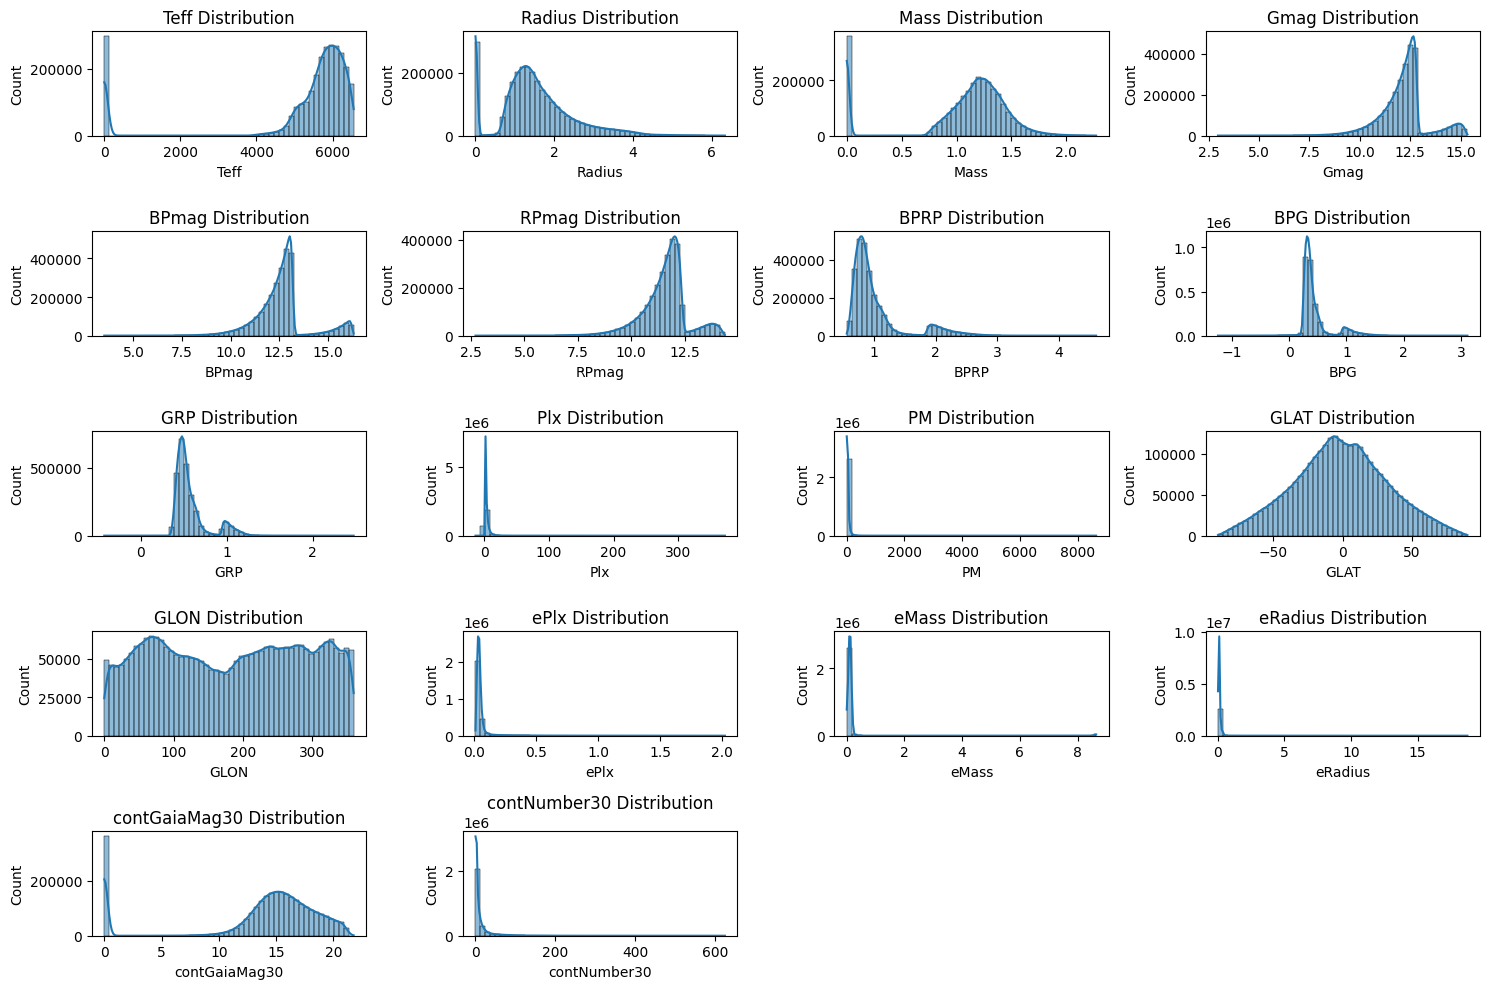

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Distribution Histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

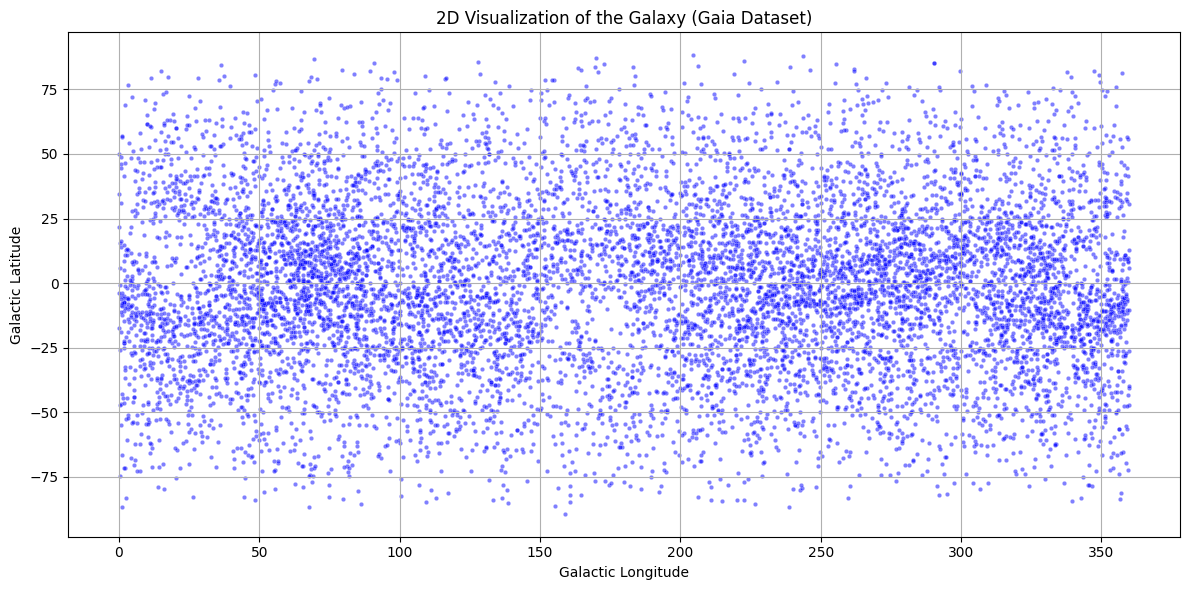

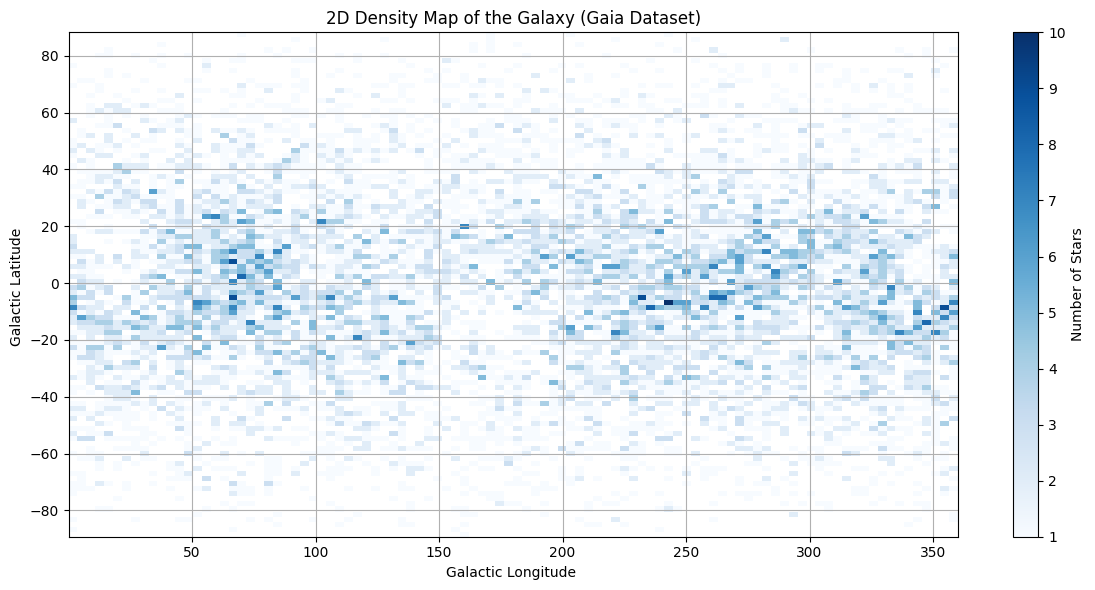

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_sample = df.sample(n=10000, random_state=42) if len(df) > 10000 else df


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sample, x='GLON', y='GLAT', s=10, alpha=0.5, color='blue')
plt.title('2D Visualization of the Galaxy (Gaia Dataset)')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.hist2d(df_sample['GLON'], df_sample['GLAT'], bins=100, cmap='Blues', cmin=1)
plt.colorbar(label='Number of Stars')
plt.title('2D Density Map of the Galaxy (Gaia Dataset)')
plt.xlabel('Galactic Longitude ')
plt.ylabel('Galactic Latitude ')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
corr = df[features].corr()
print(corr)

                   Teff    Radius      Mass      Gmag     BPmag     RPmag  \
Teff           1.000000  0.589118  0.874925 -0.650314 -0.748404 -0.547492   
Radius         0.589118  1.000000  0.821101 -0.431619 -0.473126 -0.388111   
Mass           0.874925  0.821101  1.000000 -0.561826 -0.648247 -0.469484   
Gmag          -0.650314 -0.431619 -0.561826  1.000000  0.988268  0.989699   
BPmag         -0.748404 -0.473126 -0.648247  0.988268  1.000000  0.959153   
RPmag         -0.547492 -0.388111 -0.469484  0.989699  0.959153  1.000000   
BPRP          -0.958616 -0.505760 -0.841635  0.629096  0.737532  0.516368   
BPG           -0.945276 -0.505048 -0.825348  0.610689  0.724466  0.506224   
GRP           -0.930409 -0.482429 -0.822982  0.623480  0.719574  0.505127   
Plx           -0.488608 -0.465550 -0.567039 -0.051661  0.059912 -0.147956   
PM            -0.361307 -0.327493 -0.408207 -0.013458  0.064890 -0.080985   
GLAT          -0.004197 -0.008503 -0.007445 -0.000200  0.000861 -0.000882   

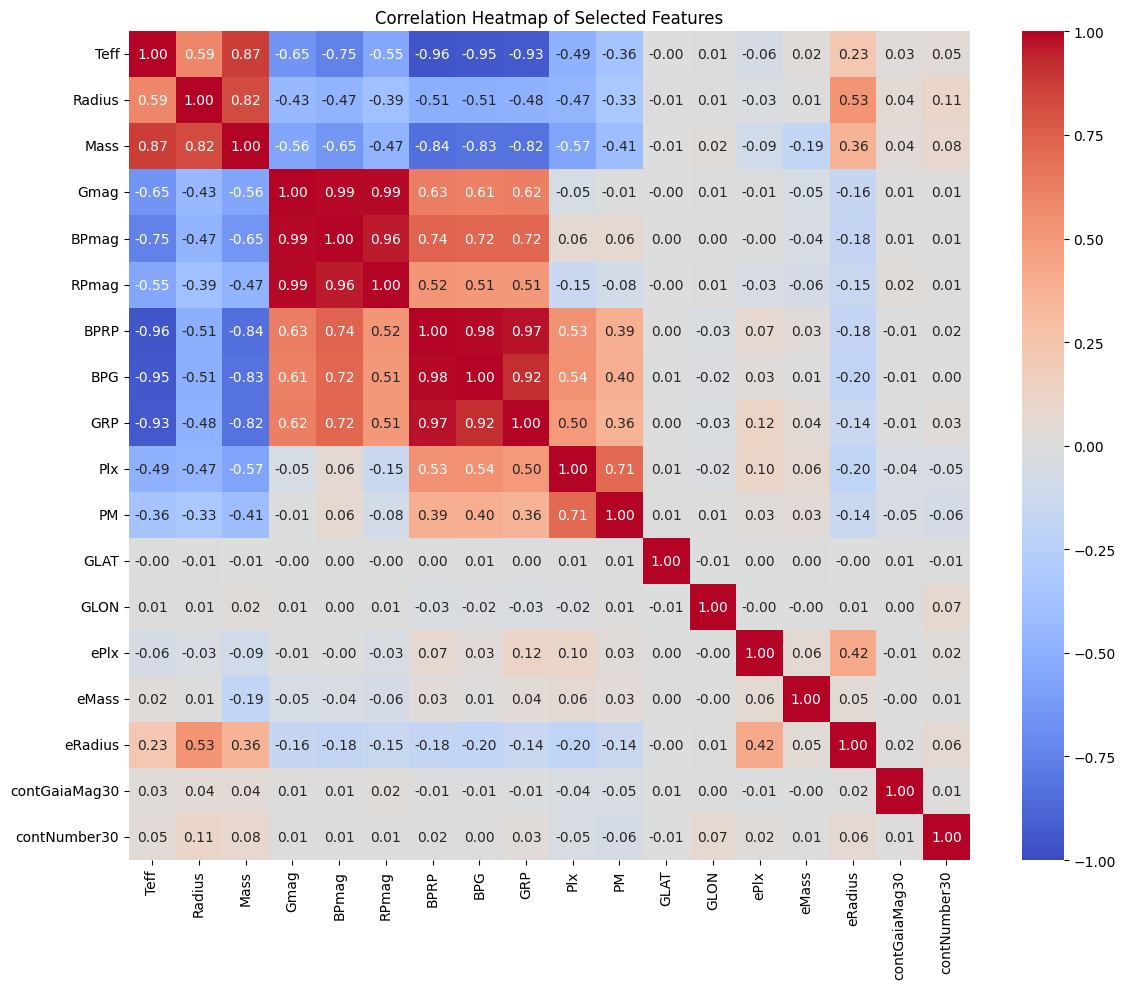

In [11]:
#  Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df[features].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()


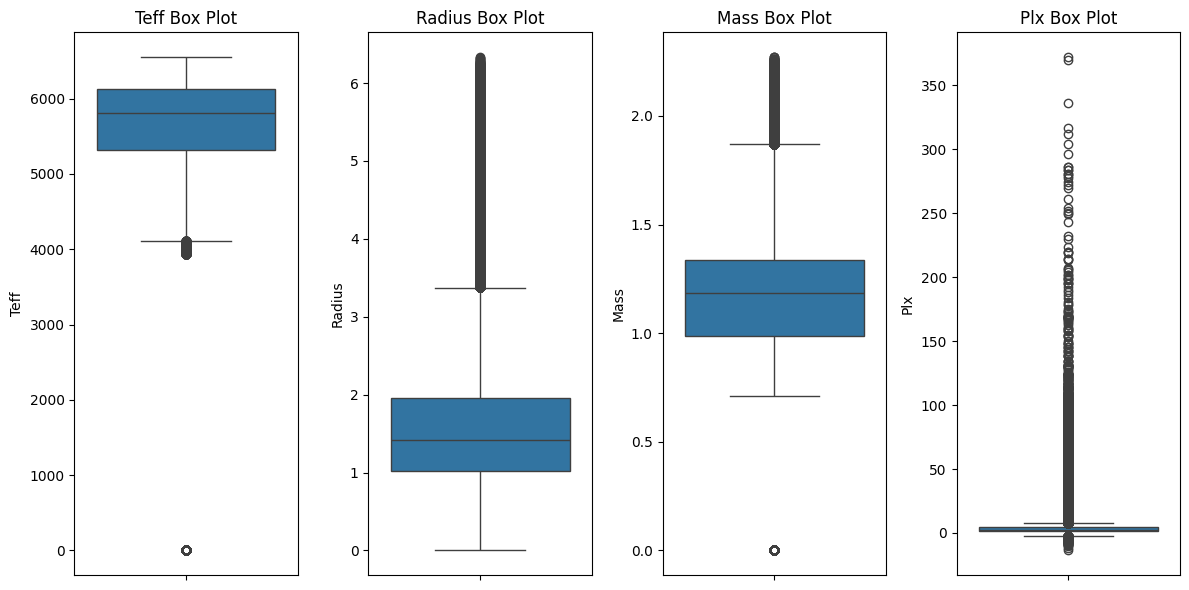

In [12]:
#  Box Plots for Key Features
key_features = ['Teff', 'Radius', 'Mass', 'Plx']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(key_features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(f'{feature} Box Plot')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [13]:
print("Summary statistics for selected features:")
print(df[features].describe())

Summary statistics for selected features:
               Teff        Radius          Mass          Gmag         BPmag  \
count  2.675539e+06  2.675539e+06  2.675539e+06  2.675539e+06  2.675539e+06   
mean   5.165509e+03  1.520651e+00  1.063814e+00  1.215569e+01  1.260079e+01   
std    1.878585e+03  9.179405e-01  4.647045e-01  1.167068e+00  1.340712e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  2.965430e+00  3.500390e+00   
25%    5.319520e+03  1.015000e+00  9.850000e-01  1.160760e+01  1.196680e+01   
50%    5.804280e+03  1.413000e+00  1.186000e+00  1.224820e+01  1.262220e+01   
75%    6.129480e+03  1.959000e+00  1.339000e+00  1.263690e+01  1.301890e+01   
max    6.553460e+03  6.335000e+00  2.271000e+00  1.533490e+01  1.632750e+01   

              RPmag          BPRP           BPG           GRP           Plx  \
count  2.675539e+06  2.675539e+06  2.675539e+06  2.675539e+06  2.675539e+06   
mean   1.157933e+01  1.021461e+00  4.450953e-01  5.763657e-01  3.732281e+00   
std    1.

In [14]:
print("Dropping rows with missing values ")
df = df[features].dropna()
print(f"Shape after dropping NaNs: {df.shape}")


Dropping rows with missing values 
Shape after dropping NaNs: (2675539, 18)


In [16]:
def remove_outliers(data, columns):
    print(f"Removing outliers in {columns} using IQR method...")
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"{col} - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}, Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df = remove_outliers(df, key_features)
print(f"Shape after outlier removal: {df.shape}")
print("Sample data after outlier removal:")
print(df.head())
    

Removing outliers in ['Teff', 'Radius', 'Mass', 'Plx'] using IQR method...
Teff - Q1: 5319.52, Q3: 6129.48, IQR: 809.96, Bounds: [4104.58, 7344.42]
Radius - Q1: 1.16, Q3: 2.05, IQR: 0.90, Bounds: [-0.19, 3.40]
Mass - Q1: 1.06, Q3: 1.34, IQR: 0.27, Bounds: [0.65, 1.75]
Plx - Q1: 1.69, Q3: 3.47, IQR: 1.78, Bounds: [-0.97, 6.13]
Shape after outlier removal: (2060760, 18)
Sample data after outlier removal:
          Teff  Radius   Mass     Gmag    BPmag    RPmag      BPRP       BPG  \
0  5487.660156   1.669  1.159  12.6231  13.0557  12.0361  1.019610  0.432592   
1  5707.509766   1.013  1.004  12.3581  12.7486  11.8158  0.932820  0.390499   
3  6029.810059   1.506  1.228  12.1713  12.5100  11.6726  0.837337  0.338654   
4  5688.899902   2.614  1.417  12.7525  13.1726  12.1814  0.991120  0.420067   
5  5237.830078   2.114  1.207  12.4244  12.9147  11.7960  1.118740  0.490325   

        GRP     Plx      PM       GLAT        GLON    ePlx  eMass  eRadius  \
0  0.587019  1.9189   9.082 -27.121

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(X_scaled, columns=features)
print("Sample scaled data:")
print(df_scaled.head())

Sample scaled data:
       Teff    Radius      Mass      Gmag     BPmag     RPmag      BPRP  \
0 -0.994905  0.036891 -0.334471  0.858491  0.953954  0.756842  1.130332   
1 -0.436776 -1.066239 -1.161178  0.488674  0.534910  0.443786  0.541237   
2  0.381443 -0.237210  0.033547  0.227987  0.209336  0.240292 -0.106864   
3 -0.484020  1.626003  1.041596  1.039074  1.113466  0.963321  0.936954   
4 -1.629145  0.785203 -0.078459  0.581198  0.761557  0.415649  1.803187   

        BPG       GRP       Plx        PM      GLAT      GLON      ePlx  \
0  1.015074  1.004490 -0.531653 -0.610996 -0.782255  1.137511 -0.301281   
1  0.506034  0.460874  0.624230 -0.156103 -0.779777  1.139069 -0.365871   
2 -0.120941 -0.069849 -0.341704  0.366948 -0.779493  1.139207 -0.355739   
3  0.863607  0.810324 -1.233442 -0.842410 -0.780829  1.139582 -0.351940   
4  1.713254  1.508007 -0.592741  0.243968 -0.778536  1.137014 -0.297481   

      eMass   eRadius  contGaiaMag30  contNumber30  
0 -0.370701 -0.013354    

In [18]:
# Kmean clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[features])
df_scaled['Cluster']


0          0
1          0
2          2
3          2
4          0
          ..
2060755    0
2060756    0
2060757    2
2060758    0
2060759    2
Name: Cluster, Length: 2060760, dtype: int32

In [19]:

# map cluster to star types and stages
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers Rescaled to original scal:")
print(centers_df)

Cluster Centers Rescaled to original scal:
          Teff    Radius      Mass       Gmag      BPmag      RPmag      BPRP  \
0  5479.631729  1.424303  1.067593  12.228029  12.647280  11.654414  0.992866   
1  6040.746599  1.735550  1.283005  10.850435  11.161123  10.391628  0.769495   
2  6106.012684  1.773736  1.309320  12.327221  12.639852  11.854607  0.785245   

        BPG       GRP       Plx         PM      GLAT        GLON      ePlx  \
0  0.419251  0.573614  3.076864  26.725496 -1.737496  176.802016  0.052787   
1  0.310688  0.458807  3.529641  26.764054 -1.062566  180.944920  0.058866   
2  0.312631  0.472614  1.733848  12.624240 -1.593158  189.140629  0.049837   

      eMass   eRadius  contGaiaMag30  contNumber30  
0  0.095505  0.130096      13.733971     12.515593  
1  0.114836  0.136290      13.398369      9.269429  
2  0.121741  0.153122      14.012652     13.333763  


In [20]:
# mapping based on astrophysical properties

cluster_map = {0: 'Main Sequence', 1: 'Giants', 2: 'White Dwarfs'}
print("Cluster to Star Type Mapping: ")
for i, row in centers_df.iterrows():
    print(f"Cluster {i} ({cluster_map[i]}): Teff={row['Teff']:.0f}K, Radius={row['Radius']:.2f}R☉, Mass={row['Mass']:.2f}M☉")
df_scaled['StarType'] = df_scaled['Cluster'].map(cluster_map)

Cluster to Star Type Mapping: 
Cluster 0 (Main Sequence): Teff=5480K, Radius=1.42R☉, Mass=1.07M☉
Cluster 1 (Giants): Teff=6041K, Radius=1.74R☉, Mass=1.28M☉
Cluster 2 (White Dwarfs): Teff=6106K, Radius=1.77R☉, Mass=1.31M☉


C:\Users\sayak\AppData\Local\Temp\ipykernel_19176\799187677.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\sayak\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


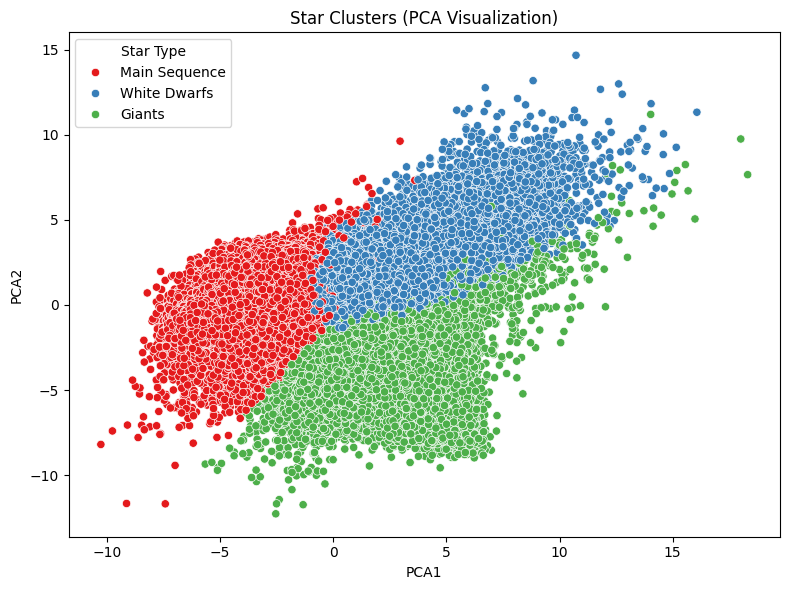

In [22]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])
df_scaled['PCA1'] = components[:, 0]
df_scaled['PCA2'] = components[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='PCA1', y='PCA2', hue='StarType', palette='Set1')
plt.title('Star Clusters (PCA Visualization)')
plt.legend(title='Star Type')
plt.tight_layout()
plt.show()


C:\Users\sayak\AppData\Local\Temp\ipykernel_19176\2704446052.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\sayak\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


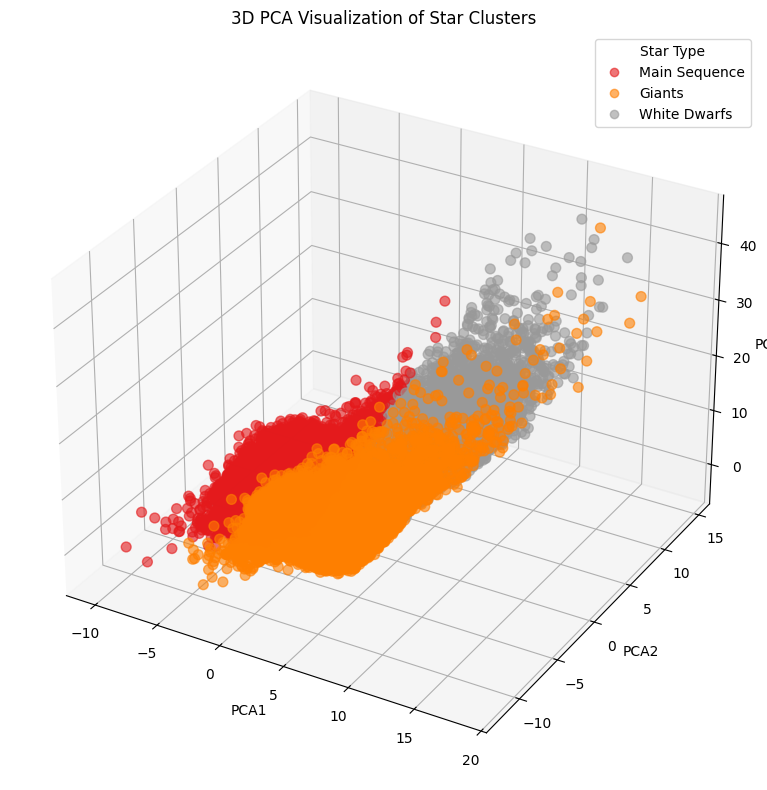

In [48]:
# 3D Scatter Plot using PCA for visualization
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(df_scaled[features])
df_scaled['PCA1'] = components_3d[:, 0]
df_scaled['PCA2'] = components_3d[:, 1]
df_scaled['PCA3'] = components_3d[:, 2]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_scaled['PCA1'],
    df_scaled['PCA2'],
    df_scaled['PCA3'],
    c=df_scaled['Cluster'],
    cmap='Set1',
    s=50,
    alpha=0.6
)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA Visualization of Star Clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=list(cluster_map.values()), title='Star Type')
plt.tight_layout()
plt.show()

In [23]:

from sklearn.model_selection import train_test_split

X = df_scaled[features].values
y = df_scaled['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.125, random_state=42, stratify=y_train
)

print(X_train.shape,  y_train.shape)
print(X_val.shape,  y_val.shape)



(1442532, 18) (1442532,)
(206076, 18) (206076,)


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# convert to pyTorch tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

In [29]:
print(X_train_tensor, X_val_tensor, X_test_tensor)

print(X_train_tensor.shape, X_val_tensor.shape,  X_test_tensor.shape)

tensor([[-1.2020,  1.3401,  0.4869,  ...,  0.4788,  0.6367, -0.1757],
        [ 1.1251,  2.5240,  2.5083,  ...,  0.6716, -0.1517,  1.3058],
        [-1.1009, -0.7636, -1.0918,  ..., -0.2195, -2.3699, -0.5049],
        ...,
        [-0.4504, -0.3751, -0.4571,  ..., -0.1863, -2.3699, -0.5049],
        [ 0.0373, -0.0976,  0.0122,  ..., -0.2328, -2.3699, -0.5049],
        [-0.6000, -0.5382, -0.6705,  ..., -0.2927,  0.2579,  0.3182]]) tensor([[ 1.3345,  1.2056,  1.7190,  ...,  0.0066,  0.0974, -0.3814],
        [ 0.0674, -0.8712, -0.7452,  ..., -0.4190,  0.4490, -0.4226],
        [-0.0929, -0.5029, -0.4251,  ..., -0.3592,  0.0995,  0.0301],
        ...,
        [ 1.0680, -0.6072, -0.0465,  ..., -0.3193, -0.3139, -0.1757],
        [-0.3659, -0.0068, -0.0891,  ..., -0.0732,  0.9078, -0.4637],
        [ 0.4371, -0.4306, -0.1265,  ..., -0.1597,  0.3386, -0.3814]]) tensor([[-0.4010,  0.5918,  0.3749,  ...,  0.0398, -2.3699, -0.5049],
        [-0.0268, -0.9519, -0.8732,  ..., -0.3924, -2.3699, -0

In [28]:
print(y_train_tensor, y_test_tensor, y_val_tensor)
print(y_train_tensor.shape, y_test_tensor.shape, y_val_tensor.shape)

tensor([0, 2, 0,  ..., 0, 2, 0]) tensor([2, 2, 0,  ..., 1, 0, 0]) tensor([1, 1, 2,  ..., 1, 2, 1])
torch.Size([1442532]) torch.Size([412152]) torch.Size([206076])


# Define neural network (ANN MODEL)
Artifical neural network

In [30]:
class StarClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(StarClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)
        

model = StarClassifier(input_dim=len(features), num_classes=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)    


In [32]:
from tqdm import tqdm

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50, patience=5):
    print("Training neural network...")
    best_val_loss = float('inf')
    epochs_no_improve = 0
    for epoch in tqdm(range(epochs), desc="Training"):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                val_loss += criterion(outputs, y_batch).item()
        val_loss /= len(val_loader)
        
        print(f"Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}")
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered")
                break

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer)

Training neural network...


Training:   0%|                                                                                 | 0/50 [00:00<?, ?it/s]

Epoch 1, Train Loss: 0.0437, Val Loss: 0.0141


Training:   4%|██▊                                                                   | 2/50 [04:54<1:51:04, 138.84s/it]

Epoch 2, Train Loss: 0.0177, Val Loss: 0.0113


Training:   6%|████▏                                                                 | 3/50 [06:32<1:34:12, 120.26s/it]

Epoch 3, Train Loss: 0.0149, Val Loss: 0.0099


Training:   8%|█████▌                                                                | 4/50 [08:15<1:26:43, 113.12s/it]

Epoch 4, Train Loss: 0.0136, Val Loss: 0.0096


Training:  10%|███████                                                               | 5/50 [09:47<1:19:19, 105.76s/it]

Epoch 5, Train Loss: 0.0126, Val Loss: 0.0134


Training:  12%|████████▍                                                             | 6/50 [11:28<1:16:19, 104.08s/it]

Epoch 6, Train Loss: 0.0119, Val Loss: 0.0081


Training:  14%|█████████▊                                                            | 7/50 [13:13<1:14:41, 104.22s/it]

Epoch 7, Train Loss: 0.0115, Val Loss: 0.0064


Training:  16%|███████████▏                                                          | 8/50 [15:09<1:15:35, 107.99s/it]

Epoch 8, Train Loss: 0.0111, Val Loss: 0.0128


Training:  18%|████████████▌                                                         | 9/50 [17:02<1:14:58, 109.73s/it]

Epoch 9, Train Loss: 0.0108, Val Loss: 0.0068


Training:  20%|█████████████▊                                                       | 10/50 [18:55<1:13:44, 110.61s/it]

Epoch 10, Train Loss: 0.0103, Val Loss: 0.0094


Training:  22%|███████████████▏                                                     | 11/50 [20:35<1:09:49, 107.43s/it]

Epoch 11, Train Loss: 0.0104, Val Loss: 0.0069


Training:  22%|███████████████▏                                                     | 11/50 [23:32<1:23:26, 128.38s/it]

Epoch 12, Train Loss: 0.0099, Val Loss: 0.0079
Early stopping triggered


In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Evaluating model on test set...")
model.load_state_dict(torch.load('best_model.pt'))
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(y_batch.numpy())

Evaluating model on test set...


In [34]:

print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(cluster_map.values())))




Accuracy: 0.9977
Classification Report:
               precision    recall  f1-score   support

Main Sequence       1.00      1.00      1.00    140509
       Giants       1.00      1.00      1.00     79695
 White Dwarfs       1.00      1.00      1.00    191948

     accuracy                           1.00    412152
    macro avg       1.00      1.00      1.00    412152
 weighted avg       1.00      1.00      1.00    412152



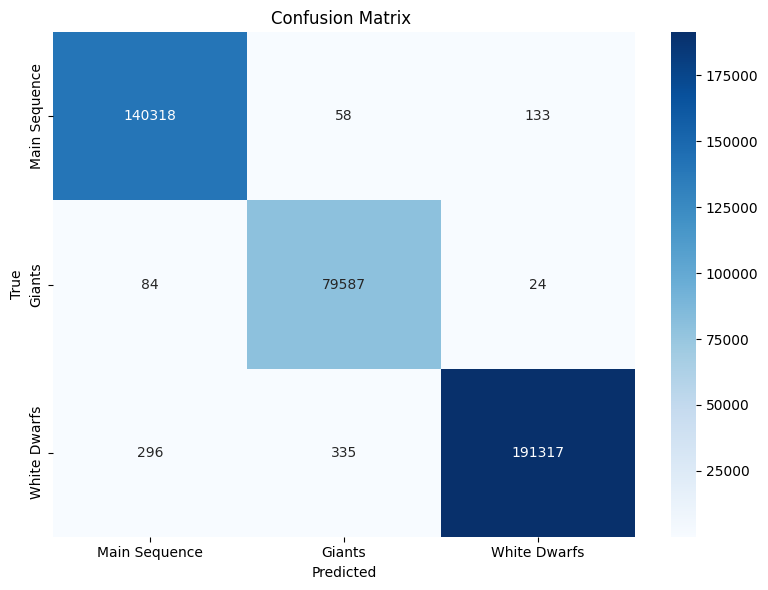

In [51]:
#  confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(cluster_map.values()), yticklabels=list(cluster_map.values()))
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [36]:
# Feature importance via permutation
def permutation_importance(model, X, y, features, criterion):
    print("\nComputing feature importance...")
    model.eval()
    baseline_loss = criterion(model(torch.tensor(X, dtype=torch.float32)), torch.tensor(y, dtype=torch.long)).item()
    importances = []
    for i in range(X.shape[1]):
        X_permuted = X.copy()
        np.random.shuffle(X_permuted[:, i])
        X_permuted_tensor = torch.tensor(X_permuted, dtype=torch.float32)
        with torch.no_grad():
            loss = criterion(model(X_permuted_tensor), torch.tensor(y, dtype=torch.long)).item()
        importances.append(loss - baseline_loss)
    return pd.DataFrame({'Feature': features, 'Importance': importances})

In [37]:
#  feature importance
importance_df = permutation_importance(model, X_test, y_test, features, criterion)
print("\nFeature Importance (higher values indicate greater impact on model):")
print(importance_df.sort_values(by='Importance', ascending=False))


Computing feature importance...

Feature Importance (higher values indicate greater impact on model):
          Feature  Importance
0            Teff    0.760060
3            Gmag    0.658528
6            BPRP    0.627538
5           RPmag    0.605863
4           BPmag    0.532655
2            Mass    0.530356
9             Plx    0.529295
7             BPG    0.504054
8             GRP    0.485881
14          eMass    0.283507
10             PM    0.256140
1          Radius    0.167701
12           GLON    0.014556
17   contNumber30    0.007755
15        eRadius    0.007398
16  contGaiaMag30    0.005131
13           ePlx    0.003638
11           GLAT    0.000166


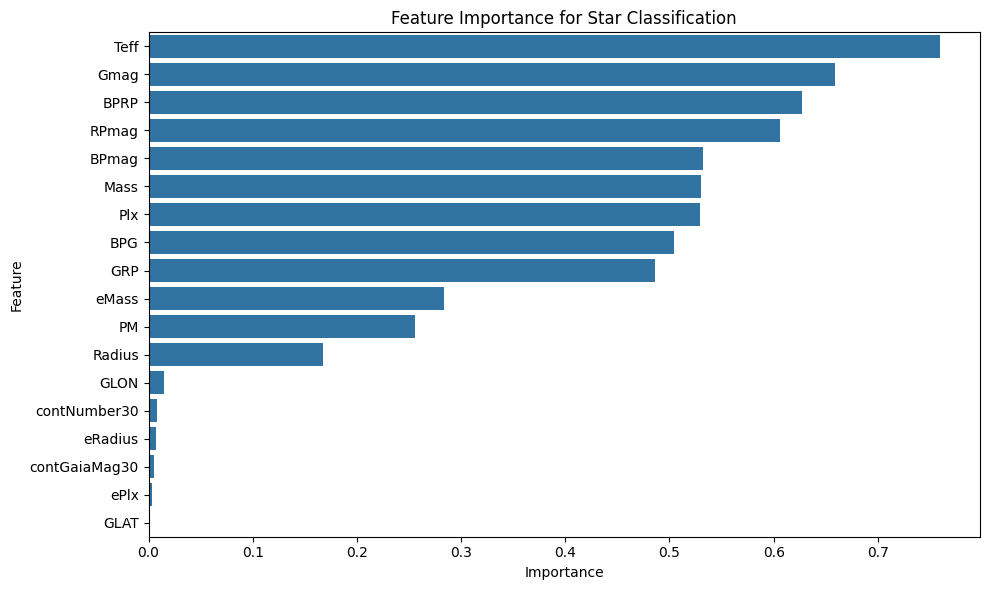

In [38]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.sort_values(by='Importance', ascending=False), x='Importance', y='Feature')
plt.title('Feature Importance for Star Classification')
plt.tight_layout()
plt.show()

In [40]:
# Predict for a new star
print("\nPredicting star type for a new star...")
new_star = pd.DataFrame([{
    'Teff': 5500, 'Radius': 1.0, 'Mass': 1.0,   'Gmag': 15.0, 'BPmag': 15.5,
    'RPmag': 14.8,  'BPRP': 0.7, 'BPG': 0.5, 'GRP': 0.2, 'Plx': 10.0,
    'PM': 30.0,   'GLAT': -10.0, 'GLON': 150.0, 'ePlx': 0.1, 'eMass': 0.1,
    'eRadius': 0.1,  'contGaiaMag30': 20.0, 'contNumber30': 1
}])

print('new star features:',  new_star)


Predicting star type for a new star...
new star features:    Teff  Radius  Mass  Gmag  BPmag  RPmag  BPRP  BPG  GRP   Plx    PM  GLAT  \
0  5500     1.0   1.0  15.0   15.5   14.8   0.7  0.5  0.2  10.0  30.0 -10.0   

    GLON  ePlx  eMass  eRadius  contGaiaMag30  contNumber30  
0  150.0   0.1    0.1      0.1           20.0             1  


In [41]:

new_star_scaled = scaler.transform(new_star[features])
new_star_tensor =  torch.tensor(new_star_scaled, dtype=torch.float32)
model.eval()
with torch.no_grad():
    output =  model(new_star_tensor)
    probabilities =   torch.softmax(output, dim=1).numpy()[0]
    _, pred_cluster =torch.max(output, 1)
print(f"Predicted Star Type: {cluster_map[pred_cluster.item()]}")
print(f"Prediction Probabilities: {', '.join([f'{cluster_map[i]}: {prob:.4f}' for i, prob in enumerate(probabilities)])}")


🆕 Predicted Star Type: Main Sequence
Prediction Probabilities: Main Sequence: 0.9998, Giants: 0.0000, White Dwarfs: 0.0002


In [47]:
# another prediction

new_stars_01 = pd.DataFrame([
  
    # Hot Main Sequence (e.g., A-type star)
    {'Teff': 9000, 'Radius': 1.5, 'Mass': 2.0, 'Gmag': 12.0, 'BPmag': 12.3, 'RPmag': 11.8, 'BPRP': 0.5, 'BPG': 0.3, 'GRP': 0.2, 'Plx': 8.0, 'PM': 20.0, 'GLAT': 0.0, 'GLON': 100.0, 'ePlx': 0.05, 'eMass': 0.2, 'eRadius': 0.15, 'contGaiaMag30': 18.0, 'contNumber30': 2},
   ])
print('new star features:', new_stars_01)



new_star_01_scaled = scaler.transform(new_stars_01[features])
new_star_01_tensor =  torch.tensor(new_star_01_scaled, dtype=torch.float32)
model.eval()
with  torch.no_grad():
    output =  model(new_star_01_tensor)
    probabilities = torch.softmax(output, dim=1).numpy()[0]
    _, pred_cluster =torch.max(output, 1)
print(f" Predicted Star Type: {cluster_map[pred_cluster.item()]}")
print(f"Prediction Probabilities: {', '.join([f'{cluster_map[i]}: {prob:.4f}' for i, prob in enumerate(probabilities)])}")

new star features:    Teff  Radius  Mass  Gmag  BPmag  RPmag  BPRP  BPG  GRP  Plx    PM  GLAT  \
0  9000     1.5   2.0  12.0   12.3   11.8   0.5  0.3  0.2  8.0  20.0   0.0   

    GLON  ePlx  eMass  eRadius  contGaiaMag30  contNumber30  
0  100.0  0.05    0.2     0.15           18.0             2  
 Predicted Star Type: Giants
Prediction Probabilities: Main Sequence: 0.0000, Giants: 0.9995, White Dwarfs: 0.0005


C:\Users\sayak\AppData\Local\Temp\ipykernel_19176\3070348939.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


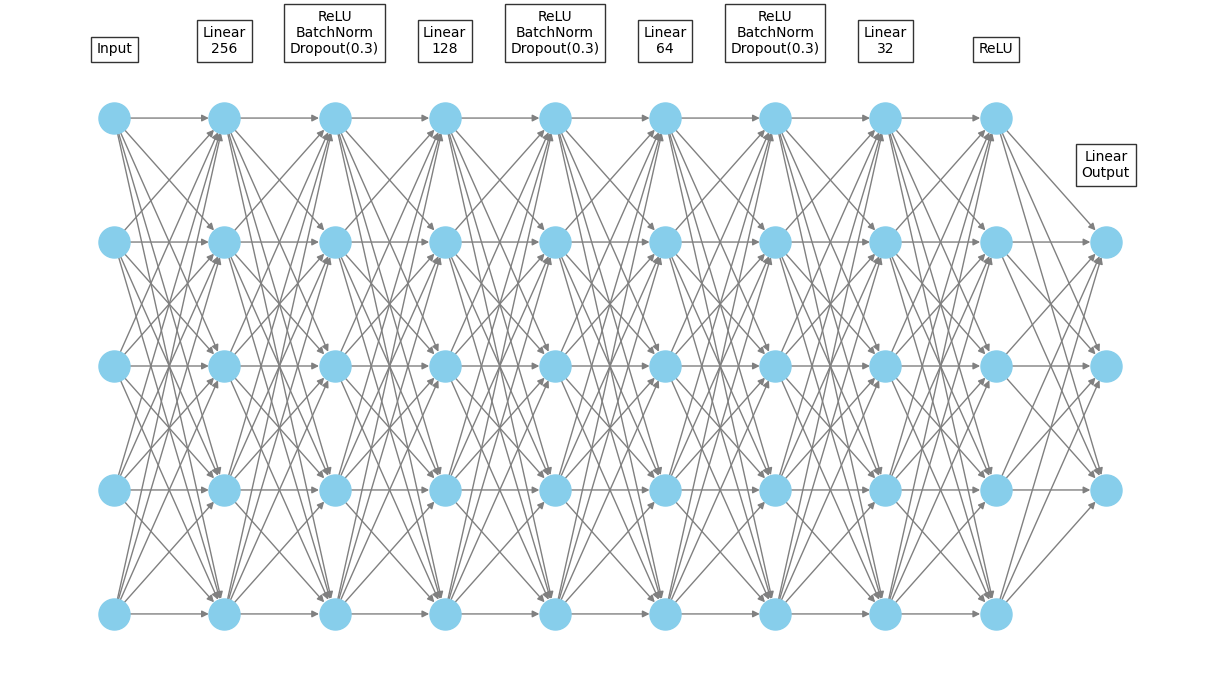

In [50]:
import matplotlib.pyplot as plt
import networkx as nx


layers = [
    ('Input', 18),
    ('Linear\n256', 256),
    ('ReLU\nBatchNorm\nDropout(0.3)', 256),
    ('Linear\n128', 128),
    ('ReLU\nBatchNorm\nDropout(0.3)', 128),
    ('Linear\n64', 64),
    ('ReLU\nBatchNorm\nDropout(0.3)', 64),
    ('Linear\n32', 32),
    ('ReLU', 32),
    ('Linear\nOutput', 3)
]


G = nx.DiGraph()

# Add nodes for each layer
for i, (layer_name, size) in enumerate(layers):
    for j in range(min(size, 5)): 
        if size > 5 and j == 4:
            G.add_node(f"{i}_{j}", label="...", layer=i)
        else:
            G.add_node(f"{i}_{j}", label="", layer=i)


for i in range(len(layers) - 1):
    current_layer_size = min(layers[i][1], 5)
    next_layer_size = min(layers[i + 1][1], 5)
    for j in range(current_layer_size):
        for k in range(next_layer_size):
            G.add_edge(f"{i}_{j}", f"{i+1}_{k}")

pos = {}
for i, (_, size) in enumerate(layers):
    for j in range(min(size, 5)):
        pos[f"{i}_{j}"] = (i, -j + min(size, 5) / 2)


plt.figure(figsize=(12, 6))
nx.draw(
    G,
    pos,
    with_labels=False,
    node_color='skyblue',
    node_size=500,
    edge_color='gray',
    arrowsize=10,
    font_size=10
)

# Add layer labels
for i, (layer_name, _) in enumerate(layers):
    plt.text(i, min(layers[i][1], 5) / 2 + 0.5, layer_name, ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


plt.axis('off')
plt.tight_layout()
plt.show()